# Proyecto de Grado - Ciencia de Datos
# Universidad Libre Cali
## Leiner Samir Rodriguez Velasco
## Miguel Angel Zapata Rubiano

#### IMPORTAMOS LAS LIBRERIAS QUE VAMOS A UTILIZAR

In [277]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
from matplotlib import pyplot as plt
import seaborn as sns # Statistical data visualization
import os
import datetime as dt
# Librerias
from datetime import datetime, timedelta
from matplotlib import dates as mpl_dates
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sb
%matplotlib inline

#### SE HACE EL LLAMADO A LAS BASES DE DATOS A USAR

In [69]:
datos = pd.read_excel('C:/Users/migue/anaconda3/content/PROYECTO/datos.xlsx')

In [70]:
datos.head()

,fecha,mes,año,canal,id_pais,pais,id_negocio,negocio,estado_sms,error,solucion,estado,cantidad
0,2020-11-01,Noviembre,2020,New_APP,1,ARGENTINA,0,POS,Procesado-Exitoso,Cambiar Password,asistencia_tecnica,Yes,71.0
1,2020-11-01,Noviembre,2020,New_APP,1,ARGENTINA,1,PRE,Procesado-Exitoso,Cambiar Password,reset_de_password,Yes,51.0
2,2020-11-01,Noviembre,2020,New_APP,1,ARGENTINA,0,POS,Procesado-Exitoso,Cambiar Password,validacion_de_credenciales,Yes,10.0
3,2020-11-01,Noviembre,2020,New_APP,1,ARGENTINA,1,PRE,Procesado-Exitoso,Cambiar Password,validacion_de_credenciales,Yes,15.0
4,2020-11-01,Noviembre,2020,New_APP,1,ARGENTINA,0,POS,Procesado-Exitoso,Cambiar Password,asistencia_tecnica,Yes,37.0


In [71]:
paises = pd.read_excel('C:/Users/migue/anaconda3/content/PROYECTO/paises.xlsx')

In [72]:
paises.head()

,pais_id,pais,latitud,longitud,coordenadas
0,1,ARGENTINA,"-81.6426644,4",-37.054444,"-37.0544439,-81.6426644,4"
1,2,CHILE,"-106.252478,4",-35.441628,"-35.4416283,-106.252478,4"
2,3,COLOMBIA,"-83.3895534,5",4.587759,"4.5877586,-83.3895534,5"
3,4,ECUADOR,"-88.3954577,6",-1.355238,"-1.3552379,-88.3954577,6"
4,5,PERU,"-84.0673974,5",-9.130473,"-9.1304727,-84.0673974,5"


#### SE COMPRUEBAN LOS NOMBRES DE LAS COLUMNAS QUE HACEN PARTE DE LAS BASES DE DATOS

In [73]:
datos.columns

Index(['fecha', 'mes', 'año', 'canal', 'id_pais', 'pais', 'id_negocio',
       'negocio', 'estado_sms', 'error', 'solucion', 'estado', 'cantidad'],
      dtype='object')

In [74]:
paises.columns

Index(['pais_id', 'pais', 'latitud', 'longitud', 'coordenadas'], dtype='object')

#### SE REALIZA LA COMPROBACION DE LOS DATOS POR NEGOCIO

In [75]:
total = datos.loc[datos['negocio'] == 'POS', 'cantidad'].sum()

In [76]:
print(total)

1275312.4544402468


In [77]:
total = datos.loc[datos['negocio'] == 'PRE', 'cantidad'].sum()

In [78]:
print(total)

735587.1715748464


#### SE HACE LA RESPECTIVA UNION DE LAS BASES DE DATOS (EN ESTE CASO SE HARA LA UNION POR EL ID DEL PAIS)

In [79]:
union = pd.merge(left=datos,right=paises, left_on='id_pais', right_on='pais_id')

In [80]:
union.shape
union

,fecha,mes,año,canal,id_pais,pais_x,id_negocio,negocio,estado_sms,error,solucion,estado,cantidad,pais_id,pais_y,latitud,longitud,coordenadas
0,2020-11-01,Noviembre,2020,New_APP,1,ARGENTINA,0,POS,Procesado-Exitoso,Cambiar Password,asistencia_tecnica,Yes,71.0,1,ARGENTINA,"-81.6426644,4",-37.054444,"-37.0544439,-81.6426644,4"
1,2020-11-01,Noviembre,2020,New_APP,1,ARGENTINA,1,PRE,Procesado-Exitoso,Cambiar Password,reset_de_password,Yes,51.0,1,ARGENTINA,"-81.6426644,4",-37.054444,"-37.0544439,-81.6426644,4"
2,2020-11-01,Noviembre,2020,New_APP,1,ARGENTINA,0,POS,Procesado-Exitoso,Cambiar Password,validacion_de_credenciales,Yes,10.0,1,ARGENTINA,"-81.6426644,4",-37.054444,"-37.0544439,-81.6426644,4"
3,2020-11-01,Noviembre,2020,New_APP,1,ARGENTINA,1,PRE,Procesado-Exitoso,Cambiar Password,validacion_de_credenciales,Yes,15.0,1,ARGENTINA,"-81.6426644,4",-37.054444,"-37.0544439,-81.6426644,4"
4,2020-11-01,Noviembre,2020,New_APP,1,ARGENTINA,0,POS,Procesado-Exitoso,Cambiar Password,asistencia_tecnica,Yes,37.0,1,ARGENTINA,"-81.6426644,4",-37.054444,"-37.0544439,-81.6426644,4"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25884,2021-04-22,Abril,2021,WEB,6,URUGUAY,0,POS,Procesado-Exitoso,FALLO_TECNICO,asistencia_tecnica,Yes,1.0,6,URUGUAY,"-58.0284717,7",-32.600557,"-32.6005567,-58.0284717,7"
25885,2021-04-23,Abril,2021,WEB,6,URUGUAY,1,PRE,Procesado-Exitoso,FALLO_TECNICO,validacion_estado_del_equipo,Yes,1.0,6,URUGUAY,"-58.0284717,7",-32.600557,"-32.6005567,-58.0284717,7"
25886,2021-04-24,Abril,2021,WEB,6,URUGUAY,0,POS,Procesado-Exitoso,FALLO_TECNICO,validacion_estado_del_equipo,Yes,1.0,6,URUGUAY,"-58.0284717,7",-32.600557,"-32.6005567,-58.0284717,7"
25887,2021-04-25,Abril,2021,WEB,6,URUGUAY,1,PRE,Procesado-Exitoso,FALLO_TECNICO,asistencia_tecnica,Yes,1.0,6,URUGUAY,"-58.0284717,7",-32.600557,"-32.6005567,-58.0284717,7"


In [81]:
df = pd.DataFrame(union)

#### SE HACE LA COMPROBACION DE LOS DATOS DE LA COLUMNA CANTIDAD PARA LOS NEGOCIOS PRE Y POS PARA COMPROBAR SI LA UNION D ELAS BASES DE DATOS NO AFECTARA LOS DATOS YA EXISTENTES

In [82]:
total = union.loc[union['negocio'] == 'POS', 'cantidad'].sum()

In [83]:
print(total)

1275312.4544402466


In [84]:
total = union.loc[union['negocio'] == 'PRE', 'cantidad'].sum()

In [85]:
print(total)

735587.1715748464


#### SE VUELVE A HACER LA COMPROBACION DE LOS NOMBRES DE LAS COLUMNAS LUEGO DE HABER HECHO LA UNION DE BASES DE DATOS

In [86]:
union.columns

Index(['fecha', 'mes', 'año', 'canal', 'id_pais', 'pais_x', 'id_negocio',
       'negocio', 'estado_sms', 'error', 'solucion', 'estado', 'cantidad',
       'pais_id', 'pais_y', 'latitud', 'longitud', 'coordenadas'],
      dtype='object')

#### SE COMPRUEBA SI EN LA UNION DE LOS DATOS NO QUEDAN DATOS NULOS

In [87]:
print(union.info())
print(union.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25889 entries, 0 to 25888
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   fecha        25889 non-null  datetime64[ns]
 1   mes          25889 non-null  object        
 2   año          25889 non-null  int64         
 3   canal        25889 non-null  object        
 4   id_pais      25889 non-null  int64         
 5   pais_x       25889 non-null  object        
 6   id_negocio   25889 non-null  int64         
 7   negocio      25889 non-null  object        
 8   estado_sms   25889 non-null  object        
 9   error        25889 non-null  object        
 10  solucion     25889 non-null  object        
 11  estado       25889 non-null  object        
 12  cantidad     25889 non-null  float64       
 13  pais_id      25889 non-null  int64         
 14  pais_y       25889 non-null  object        
 15  latitud      25889 non-null  object        
 16  long

#### SE COMPRUEBAN LOS DATOS QUE HAY POR COLUMNAS

In [88]:
union['pais_x']

0        ARGENTINA
1        ARGENTINA
2        ARGENTINA
3        ARGENTINA
4        ARGENTINA
           ...    
25884      URUGUAY
25885      URUGUAY
25886      URUGUAY
25887      URUGUAY
25888      URUGUAY
Name: pais_x, Length: 25889, dtype: object

In [89]:
pd.unique(union['pais_x'])

array(['ARGENTINA', 'ECUADOR', 'CHILE', 'COLOMBIA', 'PERU', 'URUGUAY'],
      dtype=object)

In [90]:
union['estado_sms']

0        Procesado-Exitoso
1        Procesado-Exitoso
2        Procesado-Exitoso
3        Procesado-Exitoso
4        Procesado-Exitoso
               ...        
25884    Procesado-Exitoso
25885    Procesado-Exitoso
25886    Procesado-Exitoso
25887    Procesado-Exitoso
25888    Procesado-Exitoso
Name: estado_sms, Length: 25889, dtype: object

In [91]:
pd.unique(union['estado_sms'])

array(['Procesado-Exitoso', 'FINALIZADO', 'Procesado-No-Exitoso'],
      dtype=object)

In [92]:
union['error']

0        Cambiar Password
1        Cambiar Password
2        Cambiar Password
3        Cambiar Password
4        Cambiar Password
               ...       
25884       FALLO_TECNICO
25885       FALLO_TECNICO
25886       FALLO_TECNICO
25887       FALLO_TECNICO
25888       FALLO_TECNICO
Name: error, Length: 25889, dtype: object

In [93]:
pd.unique(union['error'])

array(['Cambiar Password', 'Mensaje Error En Pantalla', 'Error Pago',
       'FALLO_TECNICO', 'BAJA SERVICIO'], dtype=object)

In [94]:
union['solucion']

0                  asistencia_tecnica
1                   reset_de_password
2          validacion_de_credenciales
3          validacion_de_credenciales
4                  asistencia_tecnica
                     ...             
25884              asistencia_tecnica
25885    validacion_estado_del_equipo
25886    validacion_estado_del_equipo
25887              asistencia_tecnica
25888              asistencia_tecnica
Name: solucion, Length: 25889, dtype: object

In [95]:
pd.unique(union['solucion'])

array(['asistencia_tecnica', 'reset_de_password',
       'validacion_de_credenciales', 'cambio_de_tarjeta',
       'validacion_estado_del_equipo', 'acuerdo_de_pago', 'refacturacion',
       'pago_de_saldo_en_mora', 'cambio_de_equipo',
       'modificacion_de_servicios', 'cancelacion_de_servicios',
       'acreditacion_de_pago'], dtype=object)

#### HACEMOS UN MAPA PARA PODER DEFINIR LAS RELACIONES DE LAS VARIABLES

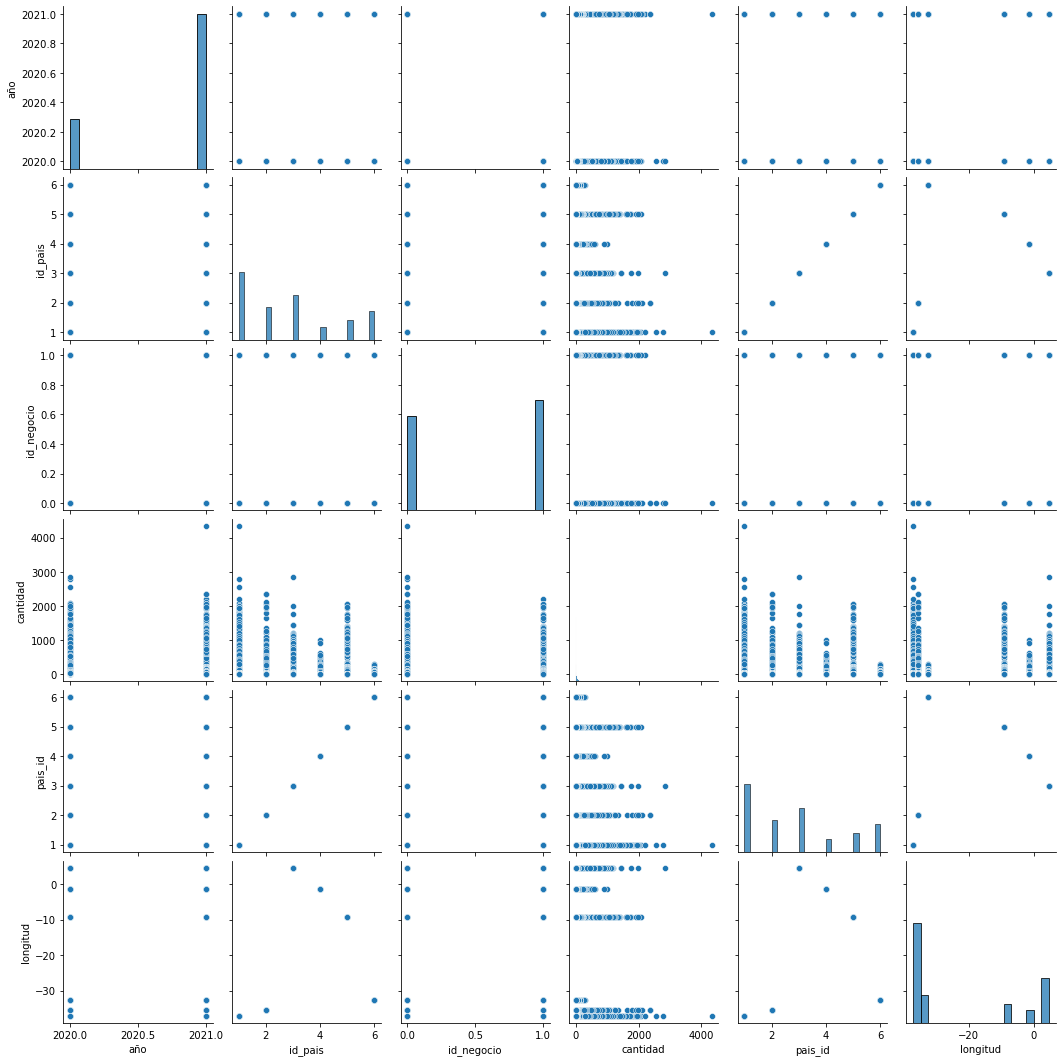

In [96]:
g = sns.pairplot(union)

#### DEMOSTRAMOS LA CANTIDAD DE CADA NEGOCIO PARA SABER CUAL NEGOCIO ES EL QUE PRESENTA MAS FALLOS

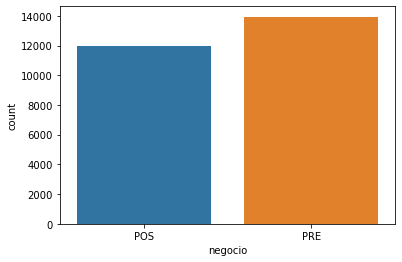

In [97]:
sns.countplot(x='negocio', data= union)
 
# Show the plot
plt.show()

#### Cantidad de errores por negocio

C:\Users\migue\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\migue\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


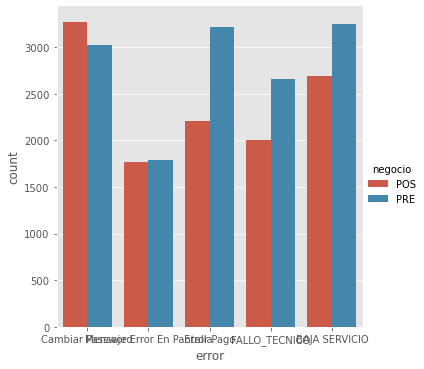

In [168]:
sb.factorplot('error',data=datos,hue='negocio',kind="count")

#### REPRESENTAMOS LOS NEGOCIOS POR MES

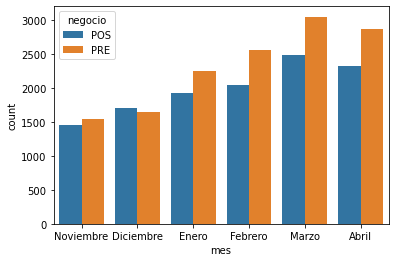

In [100]:
ax = sns.countplot(x="mes", hue="negocio", data=union)

#### Cantidad de datos por pais

C:\Users\migue\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\migue\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


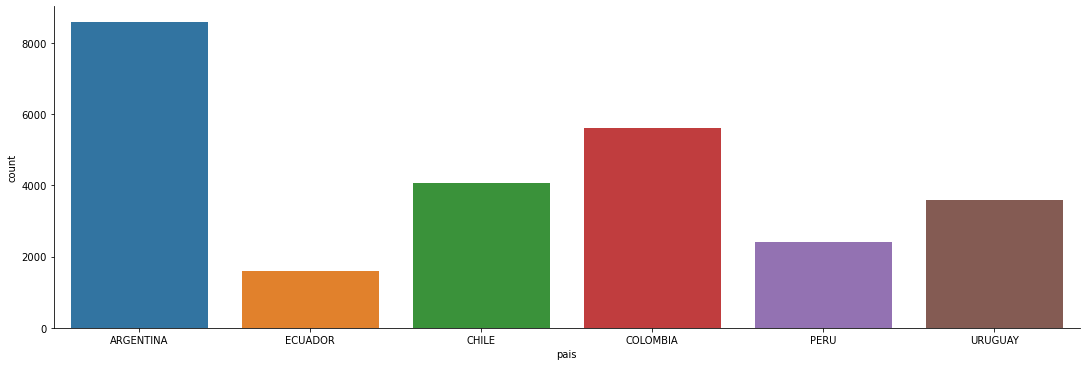

In [101]:
sb.factorplot('pais',data=datos,kind="count", aspect=3)

#### HACEMOS LA REPRESENTACION DE PAISES POR MES Y SU CANTIDAD

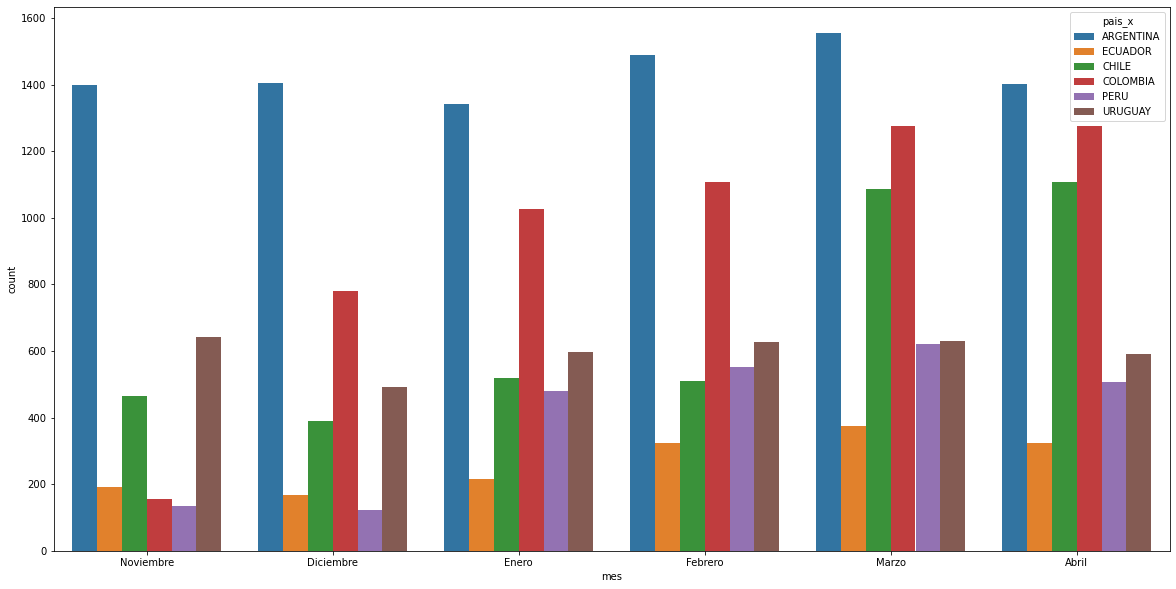

In [102]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x="mes", hue="pais_x", data=union)
plt.show()

#### REPRESENTAMOS LA CANTIDAD DEL ESTADO A LOS ERRORES PRESENTADOS

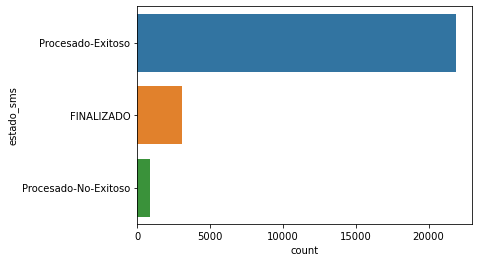

In [103]:
ax = sns.countplot(y="estado_sms", data=union)

#### DEMOSTRAMOS CUAL ES EL CANAL POR EL CUAL LOS CLIENTE MANIFIESTAN LOS ERRORES ENCONTRADOS A LA EMPRESA

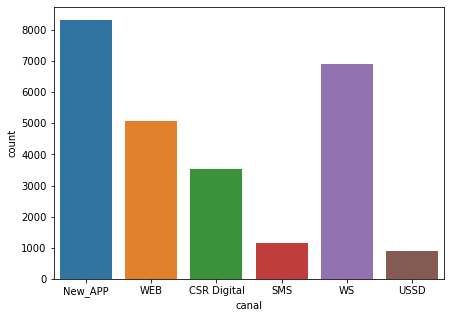

In [104]:
plt.figure(figsize=(7,5)) 
sns.countplot(x='canal', data= union)
plt.show()


#### SE HACE LA REPRESENTACION DEL ERROR MAS FRECUENTE MANIFESTADO POR EL CLIENTE

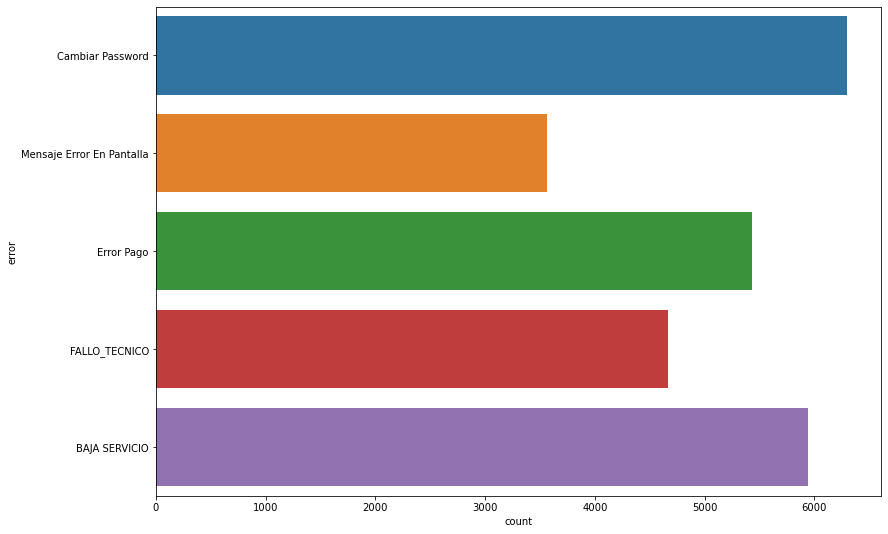

In [105]:
plt.figure(figsize=(13,9))
sns.countplot(y='error', data= union)
 
# Show the plot
plt.show()


#### SE REPRESENTA CUAL ES LA SOLUCION MAS FRECUENTE PROPORCIONADA POR LA EMPRESA 

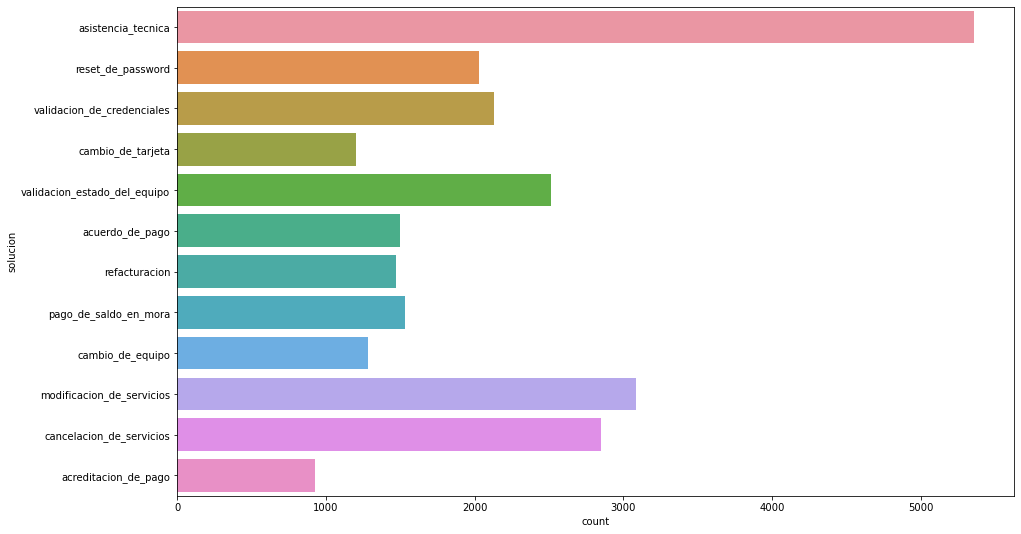

In [106]:
plt.figure(figsize=(15,9))
sns.countplot(y='solucion', data= union)
 
# Show the plot
plt.show()

#### SE REPRESENTA POR PAIS CUAL ES EL ERROR MAS FRECUENTE MANIFESTADO POR EL CLIENTE

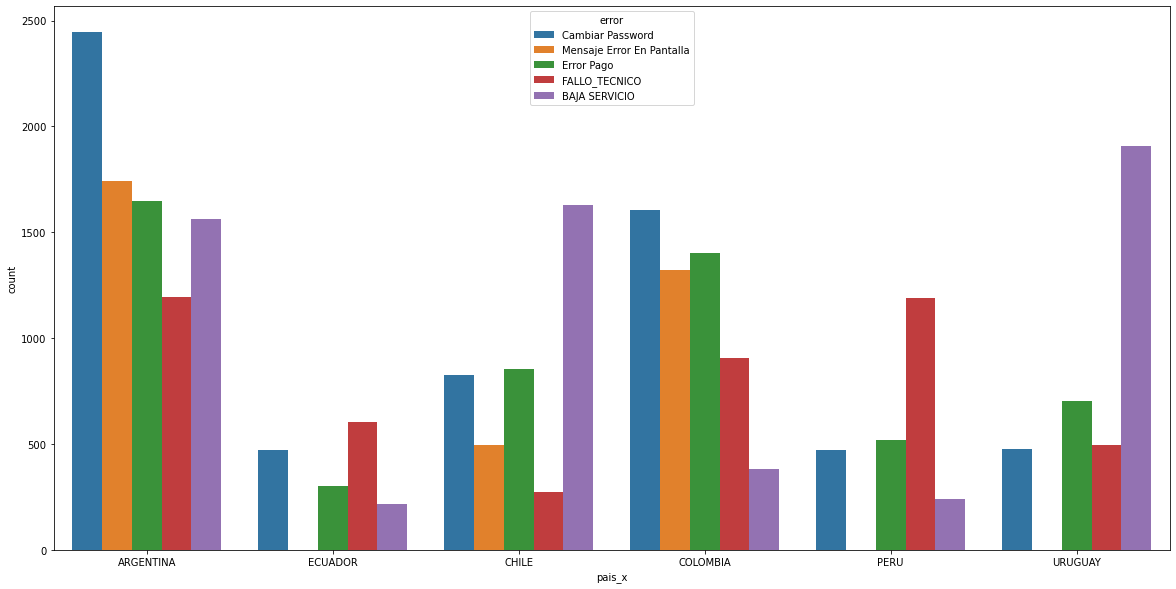

In [107]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x="pais_x", hue="error", data=union)
plt.show()

#### SE REPRENTA POR PAIS LA SOLUCION MAS FRECUENTE PROPORCIONADA POR LA EMPRESA

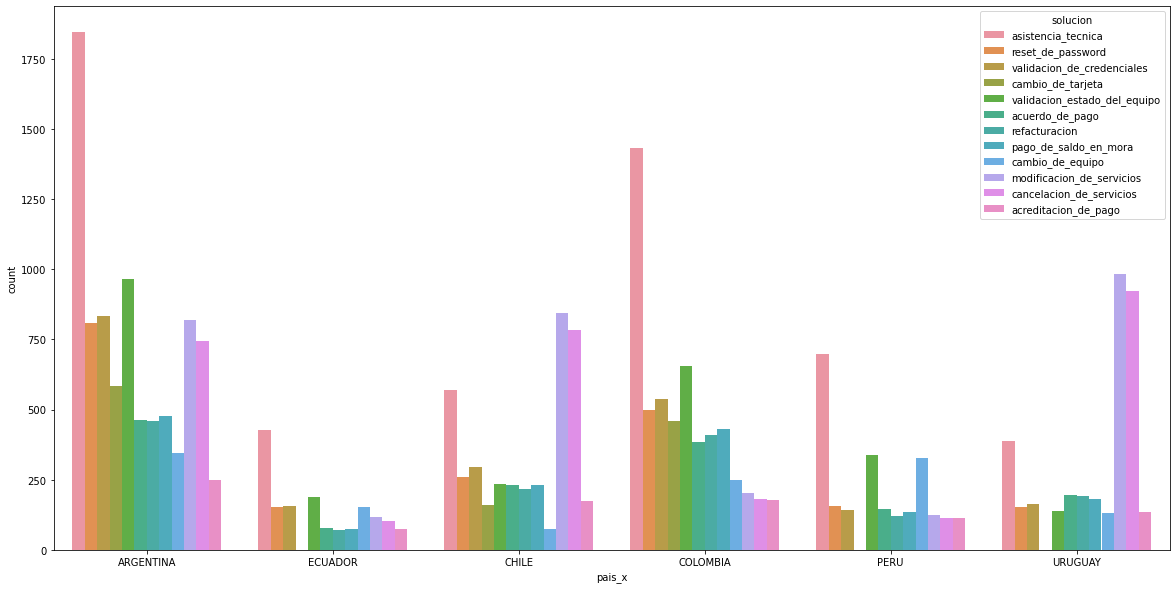

In [108]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x="pais_x", hue="solucion", data=union)
plt.show()

#### SE HACE LA REPRESENTACION DE LOS ERRORES MANIFECTADOS POR LOS CLIENTES Y LA SOLUCION QUE PROPORCIONA LA EMPRESA

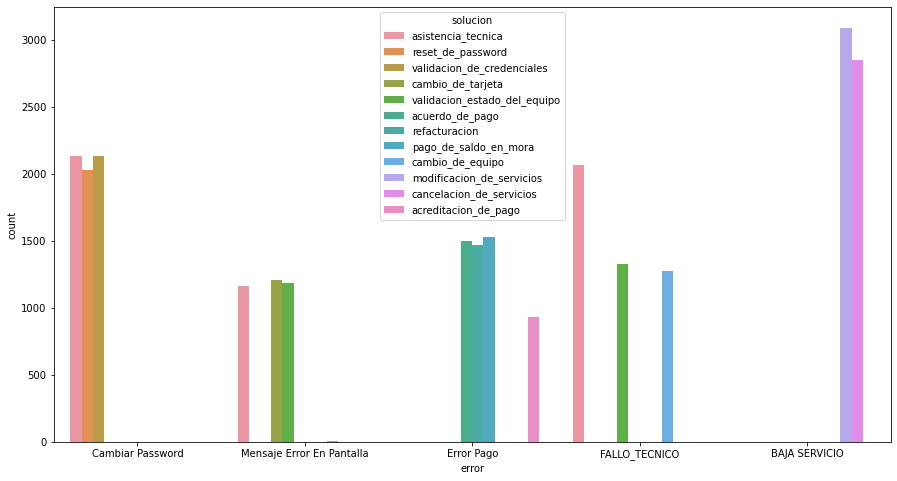

In [109]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x="error", hue="solucion", data=union)
plt.show()

#### Comportamientos Mensuales

In [110]:
# Librerias
from datetime import datetime, timedelta
from matplotlib import dates as mpl_dates

In [111]:
print("Fecha inicial", union['fecha'].min())
print("Fecha final", union['fecha'].max())
print("Cantidad de dias", union['fecha'].max() - union['fecha'].min() )

Fecha inicial 2020-11-01 00:00:00
Fecha final 2021-04-30 00:00:00
Cantidad de dias 180 days 00:00:00


### Se crea un Data Frame para realizar la serie de tiempo

In [112]:
valor = {
'fecha' : union['fecha'],
'cantidad': union['cantidad']
}
df_valor = pd.DataFrame(valor)
# se cambie el index del DataFrame
df_valor = df_valor.set_index('fecha')
df_valor.head()

,cantidad
fecha,
2020-11-01,71.0
2020-11-01,51.0
2020-11-01,10.0
2020-11-01,15.0
2020-11-01,37.0


#### Se define la serie de tiempo en la cual vamos a trabajar, en este caso de lunes a domingo

<AxesSubplot:xlabel='fecha'>

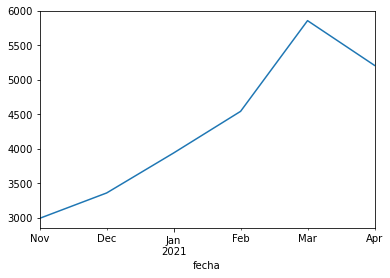

In [113]:
# resample y agregacion por mes
valor_resample_mes = df_valor.cantidad.resample('BM').count()
# asignar día de la semana
df_resample = pd.concat([valor_resample_mes], axis=1)
df_resample['dayofweek'] = df_resample.index.dayofweek # 0 es lunes
# lunes a domingo
df_lun_to_dom = df_resample[df_resample.dayofweek.isin([0,1,2,3,4,5,6])].cantidad



df_lun_to_dom.plot()

In [285]:
# Librerias
from datetime import datetime, timedelta
from matplotlib import dates as mpl_dates

In [286]:
print("Fecha inicial", union['fecha'].min())
print("Fecha final", union['fecha'].max())
print("Cantidad de dias", union['fecha'].max() - union['fecha'].min() )

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [287]:
# Se crea un Data Frame para realizar la serie de tiempo
valor = {
    'fecha' : union['fecha'],
    'cantidad': union['cantidad']
}
df_cantidad = pd.DataFrame(valor)
# se cambie el index del DataFrame
df_cantidad = df_cantidad.set_index('fecha')
df_cantidad.head()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

<AxesSubplot:xlabel='fecha'>

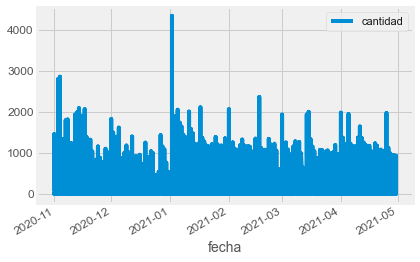

In [288]:
df_cantidad.plot()

#### Analizis de series de tiempo

In [118]:
df_union = pd.pivot_table(union,
               index=['pais_x'],
               columns=['fecha'],
               values=['cantidad'],
               aggfunc='count',
               fill_value=0,
               margins=False,
               margins_name='Total')

In [119]:
df_union

cantidad                                                         \
fecha     2020-11-01 2020-11-02 2020-11-03 2020-11-04 2020-11-05 2020-11-06   
pais_x                                                                        
ARGENTINA         50         48         46         52         56         48   
CHILE             16         17         18         16         20         15   
COLOMBIA           4          5          6          5          6          5   
ECUADOR            6          6          7          7          8          6   
PERU               5          5          5          4          4          5   
URUGUAY           16         14         20         23         22         21   

                                                       ...             \
fecha     2020-11-07 2020-11-08 2020-11-09 2020-11-10  ... 2021-04-21   
pais_x                                                 ...              
ARGENTINA         46         46         49         45  ...         46   
CHILE             17         20         15         16  ...         37   
COLOMBIA           5          5          5          6  ...         42   
ECUADOR            4          6          7          9  ...         11   
PERU               4          5          5          4  ...         18   
URUGUAY           21         14         31         21  ...         18   

                                                                             \
fecha     2021-04-22 2021-04-23 2021-04-24 2021-04-25 2021-04-26 2021-04-27   
pais_x                                                                        
ARGENTINA         47         45         47         48         46         49   
CHILE             33         35         42         42         38         40   
COLOMBIA          43         44         46         43         41         45   
ECUADOR           12         11         10         10         10         11   
PERU              17         20         10         10         10         12   
URUGUAY           23         23         21         21         22         20   

                                            
fecha     2021-04-28 2021-04-29 2021-04-30  
pais_x                                      
ARGENTINA         46         47         46  
CHILE             42         36         35  
COLOMBIA          47         45         45  
ECUADOR           12         11         12  
PERU              11         17         18  
URUGUAY           22         17         20  

[6 rows x 181 columns]

#### Se suman las filas

In [120]:
# se cambia el nombre del index
df_union = df_union.rename_axis(['pais_x'])
df_union = df_union.groupby('pais_x').agg('sum')
df_union

cantidad                                                         \
fecha     2020-11-01 2020-11-02 2020-11-03 2020-11-04 2020-11-05 2020-11-06   
pais_x                                                                        
ARGENTINA         50         48         46         52         56         48   
CHILE             16         17         18         16         20         15   
COLOMBIA           4          5          6          5          6          5   
ECUADOR            6          6          7          7          8          6   
PERU               5          5          5          4          4          5   
URUGUAY           16         14         20         23         22         21   

                                                       ...             \
fecha     2020-11-07 2020-11-08 2020-11-09 2020-11-10  ... 2021-04-21   
pais_x                                                 ...              
ARGENTINA         46         46         49         45  ...         46   
CHILE             17         20         15         16  ...         37   
COLOMBIA           5          5          5          6  ...         42   
ECUADOR            4          6          7          9  ...         11   
PERU               4          5          5          4  ...         18   
URUGUAY           21         14         31         21  ...         18   

                                                                             \
fecha     2021-04-22 2021-04-23 2021-04-24 2021-04-25 2021-04-26 2021-04-27   
pais_x                                                                        
ARGENTINA         47         45         47         48         46         49   
CHILE             33         35         42         42         38         40   
COLOMBIA          43         44         46         43         41         45   
ECUADOR           12         11         10         10         10         11   
PERU              17         20         10         10         10         12   
URUGUAY           23         23         21         21         22         20   

                                            
fecha     2021-04-28 2021-04-29 2021-04-30  
pais_x                                      
ARGENTINA         46         47         46  
CHILE             42         36         35  
COLOMBIA          47         45         45  
ECUADOR           12         11         12  
PERU              11         17         18  
URUGUAY           22         17         20  

[6 rows x 181 columns]

#### Se toman los paises como columnas

In [121]:
df_union = df_union.T
df_union

pais_x               ARGENTINA  CHILE  COLOMBIA  ECUADOR  PERU  URUGUAY
         fecha                                                         
cantidad 2020-11-01         50     16         4        6     5       16
         2020-11-02         48     17         5        6     5       14
         2020-11-03         46     18         6        7     5       20
         2020-11-04         52     16         5        7     4       23
         2020-11-05         56     20         6        8     4       22
...                        ...    ...       ...      ...   ...      ...
         2021-04-26         46     38        41       10    10       22
         2021-04-27         49     40        45       11    12       20
         2021-04-28         46     42        47       12    11       22
         2021-04-29         47     36        45       11    17       17
         2021-04-30         46     35        45       12    18       20

[181 rows x 6 columns]

### Exportamos el Dataframe con los datos

In [122]:
df_union.to_excel("Errores_pais.xlsx")

In [259]:
# Importamos la data
df_Errores_pais = pd.read_excel("Errores_pais.xlsx")
df_Errores_pais.rename({"Unnamed: 0":"columna01"}, axis="columns", inplace=True)
# Eliminamos el campo vacio creado por el multi index
df_Errores_pais.drop(["columna01"], axis=1, inplace=True)
df_Errores_pais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   fecha      181 non-null    datetime64[ns]
 1   ARGENTINA  181 non-null    int64         
 2   CHILE      181 non-null    int64         
 3   COLOMBIA   181 non-null    int64         
 4   ECUADOR    181 non-null    int64         
 5   PERU       181 non-null    int64         
 6   URUGUAY    181 non-null    int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 10.0 KB


In [260]:
# ¿Hay datos nulos?
print(df_Errores_pais.isnull().sum())

fecha        0
ARGENTINA    0
CHILE        0
COLOMBIA     0
ECUADOR      0
PERU         0
URUGUAY      0
dtype: int64


#### Para usar la función de análisis de series de tiempo, necesitamos crear un DateTime como columna de índice

In [284]:
df_Errores_pais['fecha'] = pd.to_datetime(df_Errores_pais['fecha'])
# Set the column 'Date' as index (skip if already done)
df_Errores_pais = df_Errores_pais.set_index('fecha')
# Specify datetime frequency
df_Errores_pais = df_Errores_pais.asfreq('D')
df_Errores_pais[df_Errores_pais.index.day == 15]

KeyError: 'fecha'

#### Confirmamos si hay datos nulos

In [262]:
# ¿Hay datos nulos?
print(df_Errores_pais.isnull().sum())

ARGENTINA    0
CHILE        0
COLOMBIA     0
ECUADOR      0
PERU         0
URUGUAY      0
dtype: int64


#### Se seleccionan colombia y argentina para poder hacer la estimacion con ellos y se crea el dataframe llamado Errores_pais_colombia_argentina

In [263]:
df_Errores_pais = df_Errores_pais.sort_values(by=df_Errores_pais.index.values[-1], axis=1,ascending=False)
df_Errores_pais_colombia_argentina= df_Errores_pais.iloc[:,0:2]

In [264]:
print(df_Errores_pais)

            ARGENTINA  COLOMBIA  CHILE  URUGUAY  PERU  ECUADOR
fecha                                                         
2020-11-01         50         4     16       16     5        6
2020-11-02         48         5     17       14     5        6
2020-11-03         46         6     18       20     5        7
2020-11-04         52         5     16       23     4        7
2020-11-05         56         6     20       22     4        8
...               ...       ...    ...      ...   ...      ...
2021-04-26         46        41     38       22    10       10
2021-04-27         49        45     40       20    12       11
2021-04-28         46        47     42       22    11       12
2021-04-29         47        45     36       17    17       11
2021-04-30         46        45     35       20    18       12

[181 rows x 6 columns]


#### Se saca la media remuestral por la cantidad en cada pais por semana

<AxesSubplot:xlabel='fecha'>

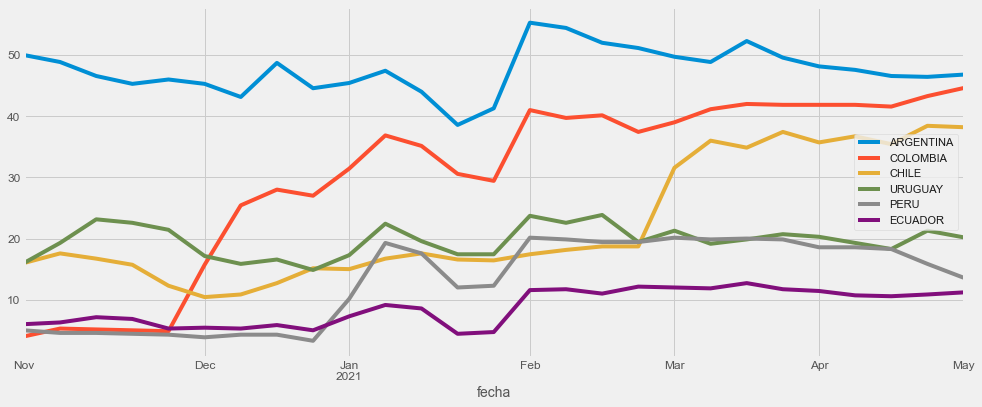

In [265]:
#Resample the dataframe
df_Errores_pais.resample('W').mean()
#You can plot the chart by adding .plot()
df_Errores_pais.resample('W').mean().plot()

<AxesSubplot:xlabel='fecha'>

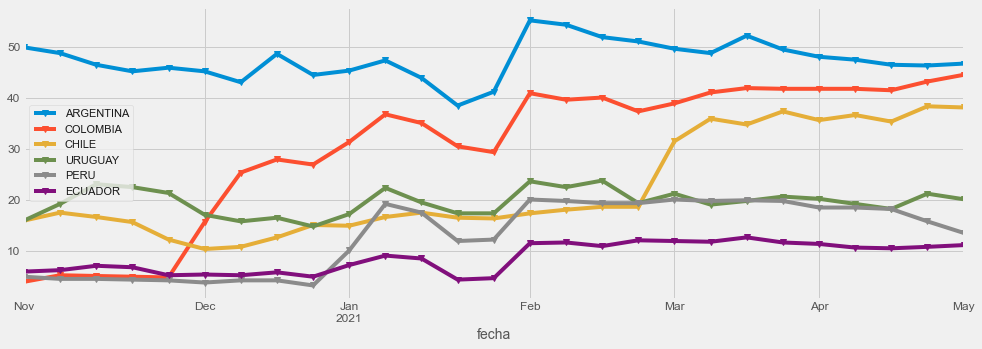

In [266]:
df_Errores_pais.resample('W').mean().plot(marker="v",figsize=(15,5))

#### Ahora, encontremos un crecimiento porcentual mensual

In [267]:
df_Errores_pais.resample('M').mean().pct_change()

,ARGENTINA,COLOMBIA,CHILE,URUGUAY,PERU,ECUADOR
fecha,,,,,,
2020-11-30,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-31,-0.028802,3.832506,-0.190427,-0.255699,-0.111111,-0.158266
2021-01-31,-0.045552,0.319641,0.331620,0.210953,2.870968,0.293413
2021-02-28,0.230159,0.193302,0.092181,0.162778,0.273214,0.665840
2021-03-31,-0.057372,0.040177,0.919576,-0.092453,0.014493,0.042184
2021-04-30,-0.067674,0.032524,0.054266,-0.028995,-0.156667,-0.107200


<AxesSubplot:xlabel='fecha'>

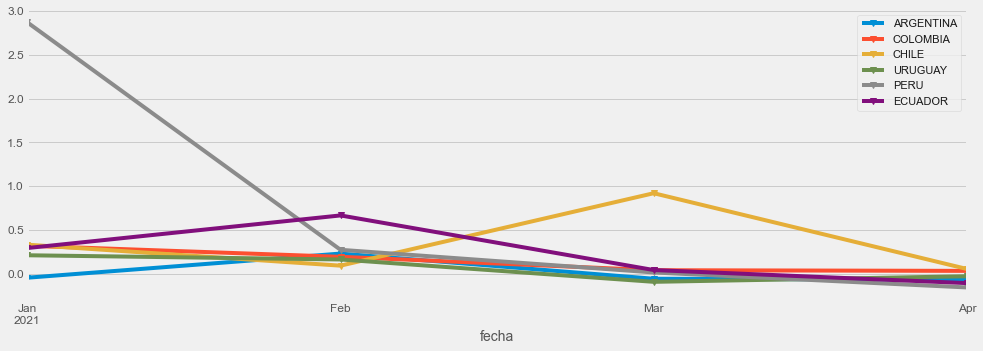

In [268]:
df_Errores_pais.resample('M').mean().pct_change().iloc[2:].plot(marker="v",figsize=(15,5))

<AxesSubplot:xlabel='fecha'>

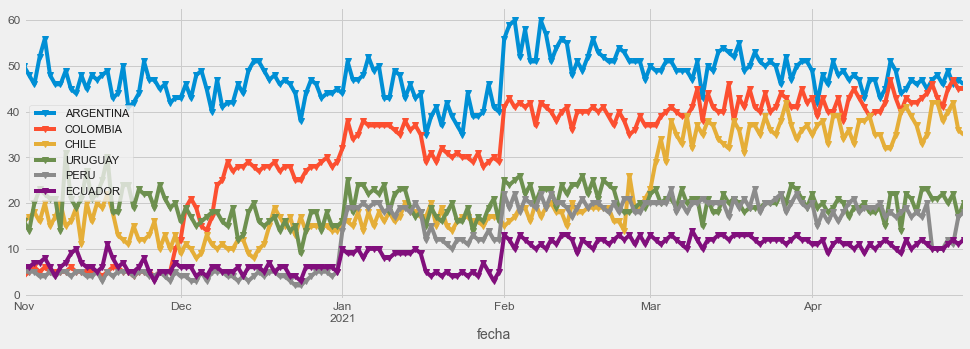

In [269]:
df_Errores_pais.rolling('D').mean().plot(marker="v",figsize=(15,5))

### Análisis en las tendencias por serie de tiempo
#### Predicciones

In [281]:
import pprint
%matplotlib inline

In [282]:
# datos = pd.DataFrame
datos = pd.DataFrame(datos)
datos.columns
# Preparación de los datos
dicc = {
    'fecha' : datos['fecha'],
    'valor': datos['cantidad']
    
}
df_prediccion = pd.DataFrame(dicc)
# elimina las filas que tengas fecha vacia (420)
df_prediccion = df_prediccion.dropna()
df_prediccion['fecha'] = pd.to_datetime(df_prediccion['fecha'], errors='coerce')
#df_prediccion = df_prediccion.set_index('FECHA')
df_prediccion.head()

KeyError: 'fecha'

In [283]:
dataset = df_prediccion

dataset['Month'] = df_prediccion['fecha'].dt.month
dataset['Year'] = df_prediccion['fecha'].dt.year
dataset['Date'] = df_prediccion['fecha'].dt.date
dataset['Time'] = df_prediccion['fecha'].dt.time
dataset['Week'] = df_prediccion['fecha'].dt.week
dataset['Day'] = df_prediccion['fecha'].dt.day_name()
dataset = df_prediccion.set_index('fecha')
dataset.index = pd.to_datetime(dataset.index)
dataset.head()

,valor,Month,Year,Date,Time,Week,Day
fecha,,,,,,,
2020-11-01,71.0,11,2020,2020-11-01,00:00:00,44,Sunday
2020-11-01,51.0,11,2020,2020-11-01,00:00:00,44,Sunday
2020-11-01,10.0,11,2020,2020-11-01,00:00:00,44,Sunday
2020-11-01,15.0,11,2020,2020-11-01,00:00:00,44,Sunday
2020-11-01,37.0,11,2020,2020-11-01,00:00:00,44,Sunday


In [280]:
x = dataset['Month']
y = dataset['valor']

In [ ]:
model = keras.Sequential([
keras.layers.Dense(32, activation=tf.nn.relu),
keras.layers.Dense(32, activation=tf.nn.relu),
keras.layers.Dense(32, activation=tf.nn.relu),
keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01)

model.compile(loss='mean_squared_error',
optimizer=optimizer,
metrics=['mean_absolute_error','mean_squared_error'])

In [ ]:
model.fit(x,y,epochs=50)

In [ ]:
model.predict([5])

In [ ]:
plt.plot(x, model.predict(x), 'r*', x,y, 'y.')